In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os
import cv2
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
# Input data files are available in the read-only "../input/" directory
import os
import matplotlib.pyplot as plt
import tensorflow as tf



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

100% 429M/429M [00:03<00:00, 137MB/s]
100% 429M/429M [00:03<00:00, 131MB/s]


In [4]:
! unzip ravdess-emotional-speech-audio.zip

Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

In [5]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 415M/428M [00:02<00:00, 169MB/s]
100% 428M/428M [00:02<00:00, 182MB/s]


In [17]:
ravdess = '/content/audio_speech_actors_01-24'

In [7]:
! unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [25]:
toronto = '/content/TESS Toronto emotional speech set data'

In [9]:
!pip install librosa


In [87]:
from IPython.display import Audio

In [78]:
import librosa

# Provide the path to your audio file
audio_path = '/content/Actor_03/03-01-01-01-01-01-03.wav'

# Load the audio file
y, sr = librosa.load(audio_path)

# Print the audio signal and the sampling rate
print("Audio signal:", y)
print("Sampling rate:", sr)



Audio signal: [-1.5090076e-05 -1.3444189e-05  6.9665953e-07 ...  3.8476814e-05
 -7.3732022e-06  4.1986523e-06]
Sampling rate: 22050


In [86]:
len(y)

75781

**Audio Signal (y)**: This represents the audio data as a one-dimensional NumPy array. Each value in the array corresponds to the amplitude of the audio signal at a specific point in time. The values are typically represented as floats or ints.

**Sampling Rate (sr)**: This is the number of samples per second used to represent the audio signal. It is commonly measured in Hertz (Hz). The sampling rate determines the quality and frequency range of the audio signal that can be accurately captured. Higher sampling rates allow for the representation of higher frequencies and better fidelity, but they also result in larger file sizes.

In [ ]:
librosa.display.waveplot(audio_path, sr=sr)

In [58]:
dictio = {'01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry', '06':'fear', '07':'disgust', '08':'surprise'}

In [59]:
os.listdir(ravdess +'/'+ os.listdir(ravdess)[1])[0].split('.')[0].split('-')[2]

'07'

In [60]:
paths = []
label = []
for dir in os.listdir(ravdess):
  for f in os.listdir(ravdess                                                                                                                                + '/' + dir):
    paths.append(ravdess + '/' + dir + '/' + f)
    label.append(f.split('.')[0].split('-')[2])

In [61]:
path_df = pd.DataFrame(paths, columns=['paths'])
label = pd.DataFrame(label, columns=['labels'])
Ravdess_df = pd.concat([path_df , label], axis=1)
Ravdess_df.labels.replace(dictio, inplace=True)

In [62]:
Ravdess_df['labels'] = Ravdess_df['labels'].apply(lambda x: x.lower())

In [63]:
Ravdess_df

,paths,labels
0,/content/audio_speech_actors_01-24/Actor_24/03...,surprise
1,/content/audio_speech_actors_01-24/Actor_24/03...,fear
2,/content/audio_speech_actors_01-24/Actor_24/03...,angry
3,/content/audio_speech_actors_01-24/Actor_24/03...,sad
4,/content/audio_speech_actors_01-24/Actor_24/03...,calm
...,...,...
1435,/content/audio_speech_actors_01-24/Actor_12/03...,disgust
1436,/content/audio_speech_actors_01-24/Actor_12/03...,calm
1437,/content/audio_speech_actors_01-24/Actor_12/03...,happy
1438,/content/audio_speech_actors_01-24/Actor_12/03...,angry


In [64]:
import seaborn as sns

In [65]:
os.listdir(toronto)

['OAF_Pleasant_surprise',
 'YAF_fear',
 'OAF_happy',
 'YAF_sad',
 'YAF_angry',
 'OAF_Sad',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'YAF_happy',
 'OAF_neutral',
 'YAF_disgust']

In [66]:
x = []
y = []
for dir in os.listdir(toronto):
  label = dir.split('_')[1]
  for fil in os.listdir(toronto + '/' + dir):
    x.append(toronto + '/' + dir + '/' + fil)
    y.append(label)

In [67]:
path_df = pd.DataFrame(x, columns=['paths'])
label = pd.DataFrame(y, columns=['labels'])
toronto_df = pd.concat([path_df , label], axis=1)
toronto_df.labels.replace({'Pleasant' : 'surprise' , 'pleasant' : 'surprise'}, inplace=True)

In [68]:
toronto_df['labels'] = toronto_df['labels'].apply(lambda x: x.lower())

In [69]:
toronto_df

,paths,labels
0,/content/TESS Toronto emotional speech set dat...,surprise
1,/content/TESS Toronto emotional speech set dat...,surprise
2,/content/TESS Toronto emotional speech set dat...,surprise
3,/content/TESS Toronto emotional speech set dat...,surprise
4,/content/TESS Toronto emotional speech set dat...,surprise
...,...,...
2795,/content/TESS Toronto emotional speech set dat...,disgust
2796,/content/TESS Toronto emotional speech set dat...,disgust
2797,/content/TESS Toronto emotional speech set dat...,disgust
2798,/content/TESS Toronto emotional speech set dat...,disgust


In [94]:
df = pd.concat([Ravdess_df , toronto_df], axis=0 , ignore_index = True)

In [95]:
df

,paths,labels
0,/content/audio_speech_actors_01-24/Actor_24/03...,surprise
1,/content/audio_speech_actors_01-24/Actor_24/03...,fear
2,/content/audio_speech_actors_01-24/Actor_24/03...,angry
3,/content/audio_speech_actors_01-24/Actor_24/03...,sad
4,/content/audio_speech_actors_01-24/Actor_24/03...,calm
...,...,...
4235,/content/TESS Toronto emotional speech set dat...,disgust
4236,/content/TESS Toronto emotional speech set dat...,disgust
4237,/content/TESS Toronto emotional speech set dat...,disgust
4238,/content/TESS Toronto emotional speech set dat...,disgust


In [72]:
df.labels.unique()

array(['surprise', 'fear', 'angry', 'sad', 'calm', 'happy', 'disgust',
       'neutral'], dtype=object)

Text(0.5, 0, 'Emotions')

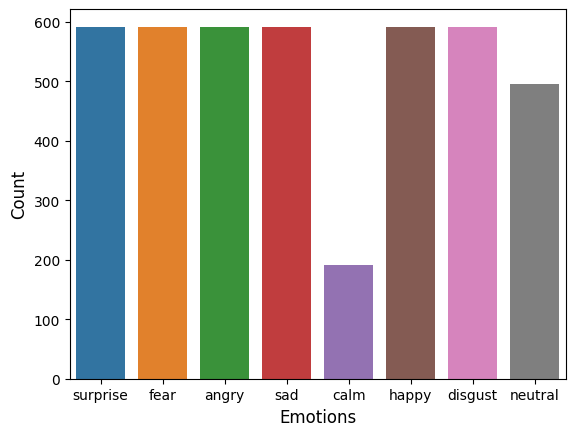

In [76]:
sns.countplot(x='labels', data=df)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

In [100]:
def wave_info(path , emotion):
  y, sr = librosa.load(path)
  plt.figure(figsize=(14, 5))
  plt.plot(y)
  plt.title('Waveform')
  plt.show()
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(12, 3))
  plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()




In [102]:
Audio(df.paths[0])

# Happy


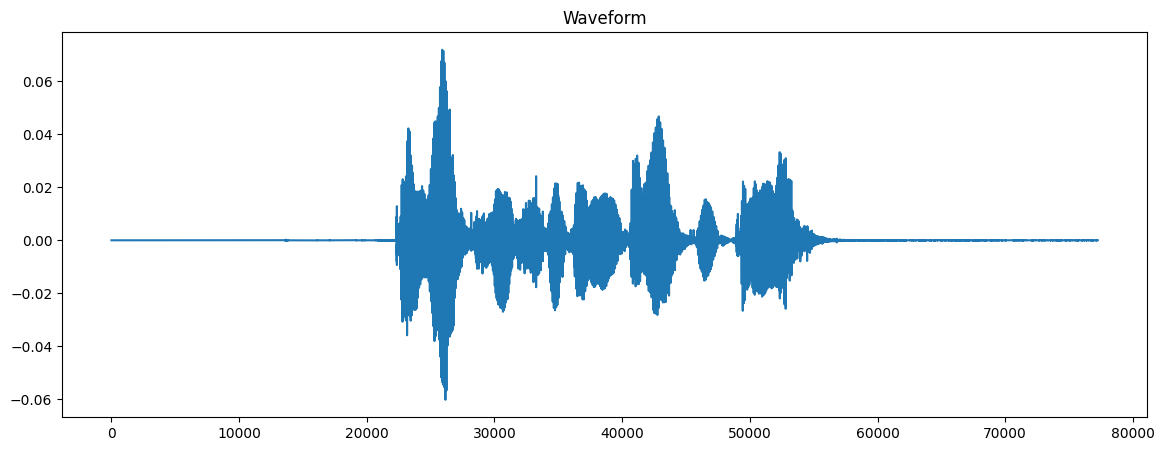

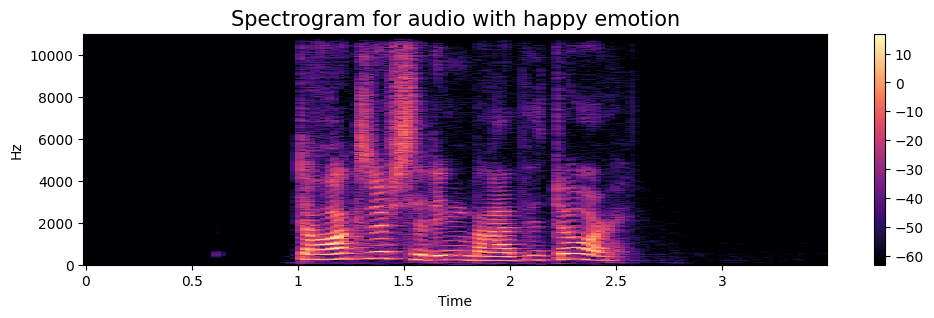

In [124]:
wave_info(np.array(df.paths[df.labels == 'happy'])[0] , 'happy')

# Angry

In [126]:
Audio(np.array(df.paths[df.labels == 'angry'])[0])

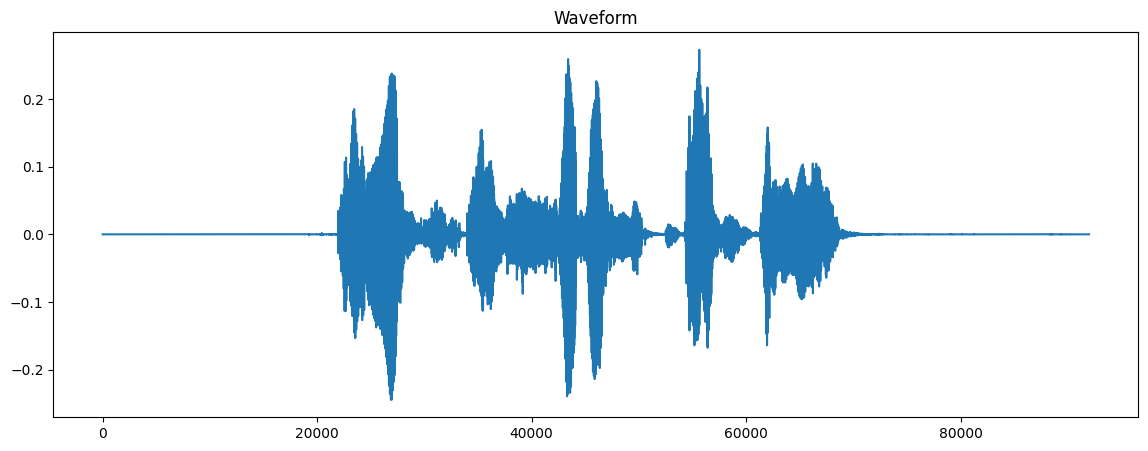

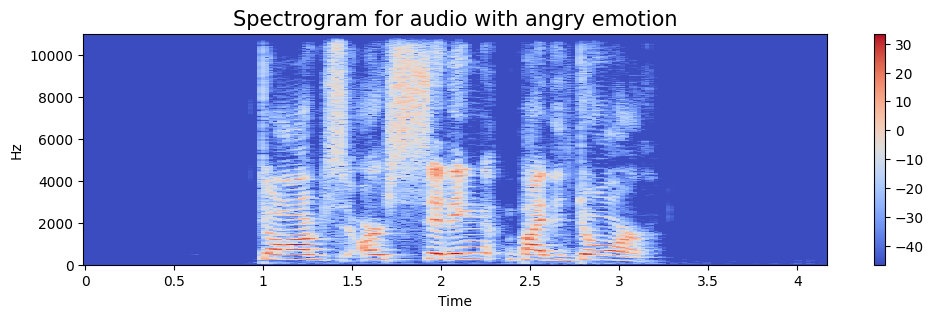

In [125]:
wave_info(np.array(df.paths[df.labels == 'angry'])[0] , 'angry')

# Data augmentation